<a href="https://colab.research.google.com/github/user1896/Neural-Network-image-classification/blob/main/ResNet/ResNet_Load_and_test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load ResNet

In [1]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load DataSet

In [2]:
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

# Prepare Pixel Data

In [3]:
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype( 'float32' )
  test_norm = test.astype( 'float32' )
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [4]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

170498071/170498071 [==============================] - 3s 0us/step


# Load the model

In [5]:
# Load the model
from tensorflow import keras
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/cnn models/ResNetGC.h5")

In [6]:
# evaluate model
_ , acc = reconstructed_model.evaluate(testX, testY, verbose=0)
print( ' > %.3f ' % (acc * 100.0))

 > 82.630 


# Confusion Matrix

In [7]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [8]:
rounded_labels=np.argmax(testY, axis=1)

p_test = reconstructed_model.predict(testX).argmax(axis=1)
cm = confusion_matrix(rounded_labels, p_test)

313/313 [==============================] - 63s 197ms/step


Confusion matrix, without normalization
[[935  20  12   6   9   0   4   1   5   8]
 [  2 979   0   0   1   0   0   0   1  17]
 [ 73  10 667  73  71  41  46   8   4   7]
 [ 43  26  13 730  84  56  23  14   5   6]
 [ 14   5  10  36 892  12  19   8   1   3]
 [ 17  15   5 135  41 753  18  10   0   6]
 [  8   8   7  61  27  13 871   2   0   3]
 [ 52  18   1  30  59  40   5 785   1   9]
 [132  54   2   4   5   1   1   3 780  18]
 [ 29  94   1   0   1   0   1   1   2 871]]


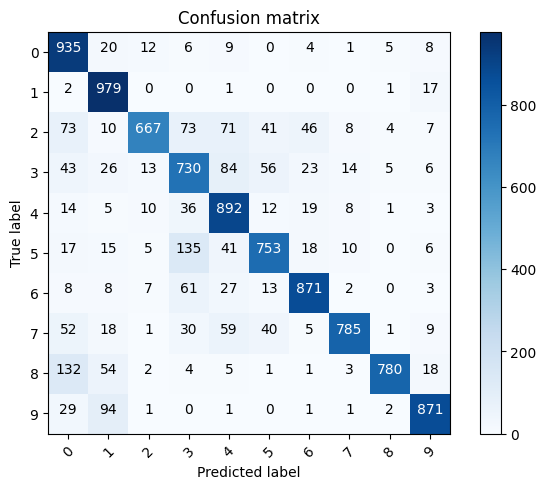

In [9]:
plot_confusion_matrix(cm, list(range(10)))

# Test The Model

In [11]:
# Label mapping
labels = '''Airplane
Car
Bird
Cat
Deer
Dog
Frog
Horse
Boat
Truck'''.split()

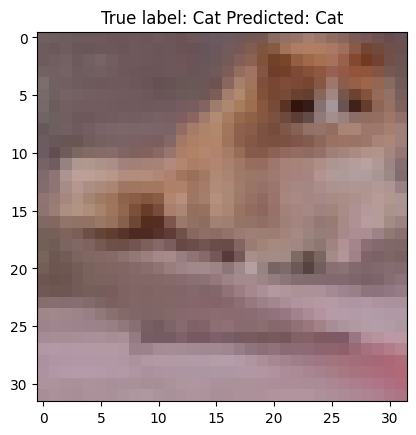

In [12]:
# Show some classified examples
classified_idx = np.where(p_test == rounded_labels)[0]
i = np.random.choice(classified_idx)
plt.imshow(testX[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[rounded_labels[i]], labels[p_test[i]]));